# CAPSTONE PROJECT - Certified Data Analyst

## 1. Connect Colab to Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

## 2. Import Packages

In [2]:
import pandas as pd
import sqlite3 as sql
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics

## 3. Connect SQLite to Python

In [3]:
conn = sql.connect('CoffeeShop_Dataset.db')
cur = conn.cursor()

## 4. Data Preparation Using SQL

### Menyiapkan semua data yang ada

In [4]:
# melihat seluruh nama tabel yang ada pada file .db
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('sales outlet',), ('pastry inventory',), ('product',), ('generations',), ('sales reciepts',), ('customer',)]


In [5]:
customerTable = pd.read_sql_query("Select * From Customer",conn)
customerTable

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951
...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990


In [6]:
productTable = pd.read_sql_query("Select * From product",conn)
productTable.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


In [7]:
salesRecieptsTable = pd.read_sql_query('''Select * From "sales reciepts"''',conn)
salesRecieptsTable.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [8]:
generationsTable = pd.read_sql_query("Select * From generations",conn)
# generationsTable.nunique()
generationsTable.head()

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


In [9]:
salesOutletTable = pd.read_sql_query('''Select * From "sales outlet"''',conn)
salesOutletTable.nunique()

sales_outlet_id         9
sales_outlet_type       2
store_square_feet       8
store_address           9
store_city              4
store_state_province    1
store_telephone         9
store_postal_code       9
store_longitude         9
store_latitude          9
manager                 8
Neighorhood             9
dtype: int64

In [10]:
pastryInventoryTable = pd.read_sql_query('''Select * From "pastry inventory"''',conn)
pastryInventoryTable.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


## 5. Problem Statement

1.   Dari Kalangan generasi apa yang paling sering berkunjung untung melakukan transaksi di toko?
2.   Produk apa yang memiliki sales tertinggi pada setiap outletnya?
3.   Produk apa yang dinilai memiliki nilai jual yang medioker dan harus diboost salesnya?
4.   Negara apa yang memiliki daya jual yang tinggi?
5.   Produk apa yang memiliki waste percentage tertinggi?

## 6. Data Preparation Using Python (Cleansing, Manipulation)

1. Cleansing tabel customer

In [11]:
# menghilangkan duplikat data (jika ada)
customerTable = customerTable.drop_duplicates()
customerTable

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951
...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990


In [12]:
misval = pd.isnull(customerTable).sum()
print(misval)
# tidak terdapat missing value

customer_id            0
home_store             0
customer_first-name    0
customer_email         0
customer_since         0
loyalty_card_number    0
birthdate              0
gender                 0
birth_year             0
dtype: int64


In [13]:
# mengubah tipe data menjadi date pada kolom birthdate
customerTable.dtypes
customerTable['birthdate']= pd.to_datetime(customerTable['birthdate'])
customerTable.dtypes

customer_id                     int64
home_store                      int64
customer_first-name            object
customer_email                 object
customer_since                 object
loyalty_card_number            object
birthdate              datetime64[ns]
gender                         object
birth_year                      int64
dtype: object

2. Cleansing Tabel Generations

In [14]:
# menghilangkan duplikat data (jika ada)
generationsTable = generationsTable.drop_duplicates()
generationsTable

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers
...,...,...
65,2011,Gen Z
66,2012,Gen Z
67,2013,Gen Z
68,2014,Gen Z


In [15]:
# mengecek adanya missing value 
misval = pd.isnull(generationsTable).sum()
print(misval)
# tidak terdapat missing value

birth_year    0
generation    0
dtype: int64


In [16]:
generationsTable.dtypes
# tidak perlu dilakukan pengubahan tipe data pada tabel tersebut

birth_year     int64
generation    object
dtype: object

3. Cleansing Tabel Pastry Inventory

In [17]:
# menghilangkan duplikat data (jika ada)
pastryInventoryTable = pastryInventoryTable.drop_duplicates()
pastryInventoryTable

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%
...,...,...,...,...,...,...,...
302,8,4/27/2019,69,18,1,17,94%
303,8,4/27/2019,70,18,4,14,78%
304,8,4/27/2019,71,18,2,16,89%
305,8,4/27/2019,72,48,19,29,60%


In [18]:
# mengecek adanya missing value 
misval = pd.isnull(pastryInventoryTable).sum()
print(misval)
# tidak terdapat missing value

sales_outlet_id     0
transaction_date    0
product_id          0
start_of_day        0
quantity_sold       0
waste               0
% waste             0
dtype: int64


In [19]:
# mengubah tipe data pada kolom transaction_date
pastryInventoryTable['transaction_date']= pd.to_datetime(pastryInventoryTable['transaction_date'])
print(pastryInventoryTable.dtypes)

sales_outlet_id              int64
transaction_date    datetime64[ns]
product_id                   int64
start_of_day                 int64
quantity_sold                int64
waste                        int64
% waste                     object
dtype: object


In [20]:
# merubah nama kolom agar lebih memudahkan dalam pengolahan data
pastryInventoryTable = pastryInventoryTable.rename(columns={'% waste': 'waste_percentage'})

# menghilangkan tanda %
pastryInventoryTable['waste_percentage'] = pastryInventoryTable['waste_percentage'].str.replace('%','')
# mengubah tipe data dari object menjadi int64
pastryInventoryTable['waste_percentage'] = pastryInventoryTable['waste_percentage'].astype('int64')
pastryInventoryTable.dtypes

sales_outlet_id              int64
transaction_date    datetime64[ns]
product_id                   int64
start_of_day                 int64
quantity_sold                int64
waste                        int64
waste_percentage             int64
dtype: object

4. Cleansing Tabel Product

In [21]:
# menghilangkan duplikat (jika ada)
productTable = productTable.drop_duplicates()
productTable

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,$0.80,Y,N,N
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,$6.00,Y,N,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,1.5 oz,0.60,$3.00,Y,N,N
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,16 oz,0.42,$2.10,Y,Y,N


In [22]:
# mengecek adanya missing value 
misval = pd.isnull(productTable).sum()
print(misval)
# tidak terdapat missing value

product_id                 0
product_group              0
product_category           0
product_type               0
product                    0
product_description        0
unit_of_measure            0
current_wholesale_price    0
current_retail_price       0
tax_exempt_yn              0
promo_yn                   0
new_product_yn             0
dtype: int64


In [23]:
# mengubah tipe data dari kolom retail price
productTable['current_retail_price'] = productTable['current_retail_price'].str.replace('$','')
productTable['current_retail_price'] = productTable['current_retail_price'].astype(float)
print(productTable.dtypes)

product_id                   int64
product_group               object
product_category            object
product_type                object
product                     object
product_description         object
unit_of_measure             object
current_wholesale_price    float64
current_retail_price       float64
tax_exempt_yn               object
promo_yn                    object
new_product_yn              object
dtype: object


C:\Users\Tangbim\AppData\Local\Temp\ipykernel_19664\1608878611.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  productTable['current_retail_price'] = productTable['current_retail_price'].str.replace('$','')


5. Cleansing Sales Outlet

In [24]:
# menghilangkan duplikat data (jika ada)
salesOutletTable = salesOutletTable.drop_duplicates()
salesOutletTable

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side
5,7,retail,1200,224 E 57th Street,New York,NY,287-817-2330,10021,-73.960000,40.770000,26.0,Upper East Side
6,8,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
7,9,retail,1700,175 8th Avenue,New York,NY,242-212-0080,10011,-74.000502,40.742760,36.0,Chelsea
8,10,retail,1600,183 W 10th Street,New York,NY,674-646-6434,10014,-74.002722,40.734367,41.0,Greenwich Village


In [25]:
# mengecek adanya missing value 
misval = pd.isnull(salesOutletTable).sum()
print(misval)
# terdapat missing value pada kolom manager

sales_outlet_id         0
sales_outlet_type       0
store_square_feet       0
store_address           0
store_city              0
store_state_province    0
store_telephone         0
store_postal_code       0
store_longitude         0
store_latitude          0
manager                 1
Neighorhood             0
dtype: int64


In [26]:
# mengecek median dan mean untuk mengganti nilai missing value
salesOutletTable.describe()

rasio = misval.div(len(salesOutletTable))
print(rasio)
print("Kolom bike_id memiliki rasio <1% missing data sehingga akan dilakukan pengisian data\n")

managerDesc = salesOutletTable['manager'].describe()
print(managerDesc)

sales_outlet_id         0.000000
sales_outlet_type       0.000000
store_square_feet       0.000000
store_address           0.000000
store_city              0.000000
store_state_province    0.000000
store_telephone         0.000000
store_postal_code       0.000000
store_longitude         0.000000
store_latitude          0.000000
manager                 0.111111
Neighorhood             0.000000
dtype: float64
Kolom bike_id memiliki rasio <1% missing data sehingga akan dilakukan pengisian data

count     8.000000
mean     23.500000
std      12.247449
min       6.000000
25%      14.750000
50%      23.500000
75%      32.250000
max      41.000000
Name: manager, dtype: float64


In [27]:
# melakukan pengisian data
salesOutletTable['manager'].fillna(int(salesOutletTable['manager'].mean()), inplace=True)
misval = pd.isnull(salesOutletTable).sum()
print(misval)

# sudah tidak terdapat missing value

sales_outlet_id         0
sales_outlet_type       0
store_square_feet       0
store_address           0
store_city              0
store_state_province    0
store_telephone         0
store_postal_code       0
store_longitude         0
store_latitude          0
manager                 0
Neighorhood             0
dtype: int64


In [28]:
print(salesOutletTable.dtypes)
# tidak perlu dilakukan perubahan data
salesOutletTable.head()

sales_outlet_id           int64
sales_outlet_type        object
store_square_feet         int64
store_address            object
store_city               object
store_state_province     object
store_telephone          object
store_postal_code         int64
store_longitude         float64
store_latitude          float64
manager                 float64
Neighorhood              object
dtype: object


,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,23.0,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side


6. Cleansing Sales Receipts

In [29]:
# menghilangkan data duplikat
salesRecieptsTable = salesRecieptsTable.drop_duplicates()
salesRecieptsTable

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


In [30]:
# mengecek adanya missing value 
misval = pd.isnull(salesOutletTable).sum()
print(misval)
# tidak ada missing value

sales_outlet_id         0
sales_outlet_type       0
store_square_feet       0
store_address           0
store_city              0
store_state_province    0
store_telephone         0
store_postal_code       0
store_longitude         0
store_latitude          0
manager                 0
Neighorhood             0
dtype: int64


In [31]:
# mengubah tipe data
print(salesRecieptsTable.dtypes)

# mengubah tipe data date dan time
salesRecieptsTable['transaction_date']= pd.to_datetime(salesRecieptsTable['transaction_date'])
salesRecieptsTable['transaction_time']= pd.to_datetime(salesRecieptsTable['transaction_time'], format='%H:%M:%S').dt.time
print("\n")
print(salesRecieptsTable.dtypes)

transaction_id        int64
transaction_date     object
transaction_time     object
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_yn           object
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_yn        object
dtype: object


transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
sales_outlet_id              int64
staff_id                     int64
customer_id                  int64
instore_yn                  object
order                        int64
line_item_id                 int64
product_id                   int64
quantity                     int64
line_item_amount           float64
unit_price                 float64
promo_item_yn               object
dtype: object


## 7. Handling Outlier

1. Tabel Sales Receipts

In [32]:
print(f"jumlah baris = {salesRecieptsTable.shape[0]}")

jumlah baris = 49894


In [33]:
# fungsi untuk mengecek adanya outliers
def check_outliers(df, column):
    # menghitung mean dan std
    mean = df[column].mean()
    std = df[column].std()

    # menghitung batas atas dan batas bawah
    batasAtas = mean + (3 * std)
    batasBawah = mean - (3 * std)

    # membuat filter Boolean untuk outlier
    outlier_filter = (df[column] > batasAtas) | (df[column] < batasBawah)

    # mengembalikan DataFrame yang mengandung outlier beserta jumlah barisnya
    return df[outlier_filter], outlier_filter.sum()

# mengecek outliers pada kolom line_item_amount
outliers, num_outliers = check_outliers(salesRecieptsTable, 'line_item_amount')

# menampilkan jumlah outlier pada kolom yang mengandung outliers
print(f'outliers pada kolom line item amount adalah')
print(f'Jumlah outlier: {num_outliers}')

outliers pada kolom line item amount adalah
Jumlah outlier: 523


In [34]:
# membuat fungsi untuk menghapus outliers
def remove_outliers(df, cols):
      for col in cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
      return df

# menghapus outliers
salesRecieptsTable = remove_outliers(salesRecieptsTable,['line_item_amount','unit_price'])


In [35]:
salesRecieptsTable

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


outliers telah dihapus dengan dibuktikan berkurangnya jumlah kolom pada tabel sales receipt

## 8. Exploratory Data Analysis & Visualization

1.   Dari Kalangan generasi apa yang paling sering berkunjung untung melakukan transaksi di toko?

In [36]:
# merging tabel customer dengan tabel generations
customerMerged = pd.merge(customerTable,generationsTable,on="birth_year")
customerMerged.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,Baby Boomers
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,Baby Boomers
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,Baby Boomers
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,Baby Boomers
4,301,3,Alika Rivas,Yoshi@aliquam.us,2017-01-04,021-443-0682,1950-05-13,F,1950,Baby Boomers


In [37]:
# menghitung jumlah customer terdaftar berdasarkan gender
print("Customer Gender stats:")
genderCust = customerMerged['gender'].value_counts()
print(f"{genderCust}\n")

# menghitung jumlah generasi customer 
print("Customer Generations stats:")
generationsCust = customerMerged['generation'].value_counts()
print(generationsCust)

Customer Gender stats:
F    977
M    726
N    543
Name: gender, dtype: int64

Customer Generations stats:
Baby Boomers           529
Gen X                  522
Older Millennials      515
Gen Z                  382
Younger Millennials    298
Name: generation, dtype: int64


Text(0, 0.5, 'Jumlah')

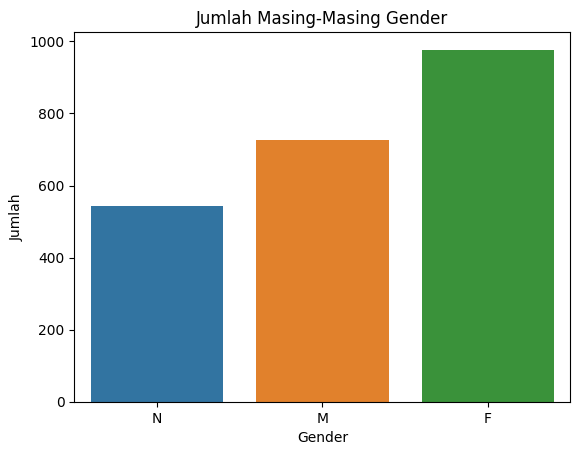

In [38]:
# membuat bar chart
sns.barplot(x=genderCust.index, y=genderCust.values, order=customerMerged['gender'].value_counts(ascending=True).index)

# memberi judul pada chart
plt.title('Jumlah Masing-Masing Gender')

# memberi label pada sumbu x
plt.xlabel('Gender')

# memberi label pada sumbu y
plt.ylabel('Jumlah')

Text(0, 0.5, 'Jumlah')

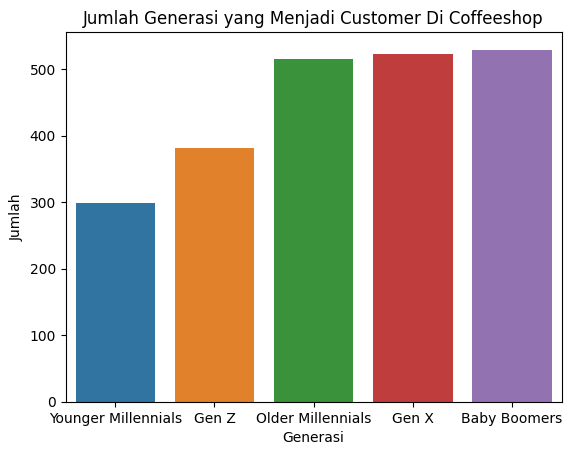

In [39]:
# membuat bar chart
sns.barplot(x=generationsCust.index, y=generationsCust.values,order=customerMerged['generation'].value_counts(ascending=True).index)

# memberi judul pada chart
plt.title('Jumlah Generasi yang Menjadi Customer Di Coffeeshop')

# memberi label pada sumbu x
plt.xlabel('Generasi')

# memberi label pada sumbu y
plt.ylabel('Jumlah')

Text(0, 0.5, 'Jumlah Transaksi')

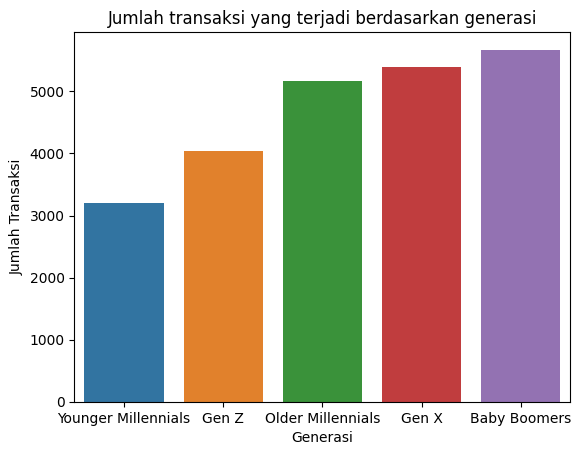

In [40]:
# menghitung jumlah pembeli berdasarkan generasi
wholesales = pd.merge(salesRecieptsTable, customerMerged, on='customer_id')
wholesales = pd.merge(wholesales, productTable, on='product_id')

generation_sales = wholesales.groupby('generation')['transaction_id'].count()

# sortir terlebih dahulu
generation_sales = generation_sales.sort_values(ascending=True)

# membuat bar chart
sns.barplot(x=generation_sales.index, y=generation_sales.values)

# memberi judul pada chart
plt.title('Jumlah transaksi yang terjadi berdasarkan generasi')

# memberi label pada sumbu x
plt.xlabel('Generasi')

# memberi label pada sumbu y
plt.ylabel('Jumlah Transaksi')

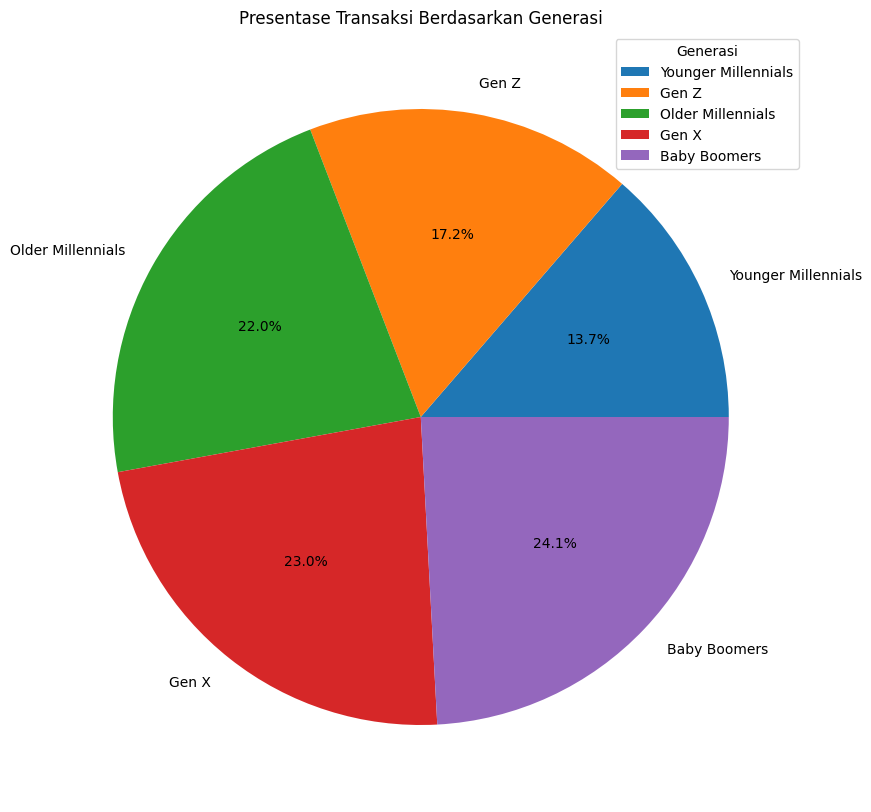

In [41]:
# mengubah data ke dalam bentuk presentase
generation_sales_pct = generation_sales / generation_sales.sum() * 100

# membuat pie chart
plt.figure(figsize=(12, 10))
plt.pie(generation_sales_pct, labels=generation_sales_pct.index, autopct='%1.1f%%')

# menghias diagram
plt.title('Presentase Transaksi Berdasarkan Generasi')
plt.legend(title='Generasi')

# menampilkan diagram
plt.show()

2.  Produk apa yang memiliki sales tertinggi pada setiap outletnya?

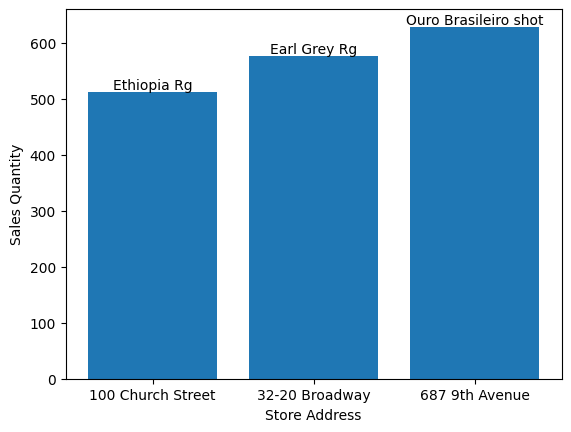

In [42]:
# Merging tabel salesReceipt dengan produk untuk mendapat nama produk
sales_receipt = pd.merge(salesRecieptsTable, productTable, on='product_id')

# Merge tabel salesReceipt dengan salesOutlet untuk mendapat store address
sales_receipt = pd.merge(sales_receipt, salesOutletTable, on='sales_outlet_id')

# Jumlahkan total sales yang ada pada setiap alamat toko
sales_by_outlet_product = sales_receipt.groupby(['store_address', 'product'])['quantity'].sum().reset_index()

# ambil indeks dari baris dengan penjualan tertinggi untuk setiap alamat toko
max_sales_index = sales_by_outlet_product.groupby('store_address')['quantity'].idxmax()

# ambil baris degnan penjualan tertinggi untuk setiap store addres
top_products = sales_by_outlet_product.loc[max_sales_index]

# membuat bar chart
plt.bar(top_products['store_address'], top_products['quantity'])

# tambahkan label pada sumbu x y
plt.xlabel('Store Address')
plt.ylabel('Sales Quantity')

# looping untuk menambahkan label per produk tertingginya
for i in range(len(top_products)):
      plt.text(x=top_products['store_address'].iloc[i], y=top_products['quantity'].iloc[i], 
                  s=top_products['product'].iloc[i], ha='center', va='bottom')

# tampilkan
plt.show()

3.   Produk apa yang memiliki waste percentage tertinggi?

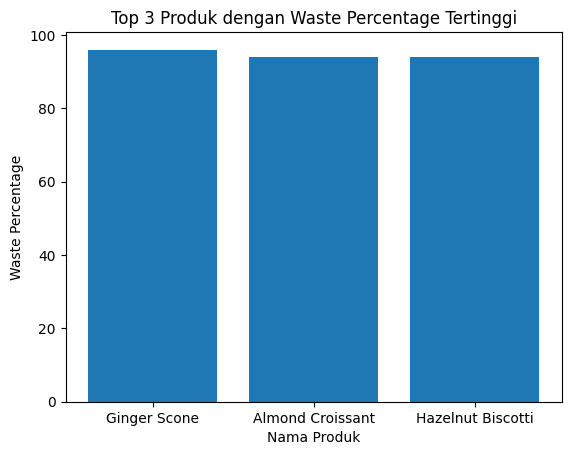

In [43]:
pastryProduct = pd.merge(pastryInventoryTable,productTable, on='product_id')

# urutan dari terbesar top 3 produk dengan waste percentage tertinggi
top_waste_products = pastryProduct.sort_values('waste_percentage', ascending=False).head(3)

# membuat bar chartnya
plt.bar(top_waste_products['product'], top_waste_products['waste_percentage'])

# modifikasi label dan judul
plt.xlabel('Nama Produk')
plt.ylabel('Waste Percentage')
plt.title('Top 3 Produk dengan Waste Percentage Tertinggi')

# tampilkan
plt.show()

4.   Produk apa yang dinilai memiliki nilai jual yang medioker dan harus diboost salesnya?

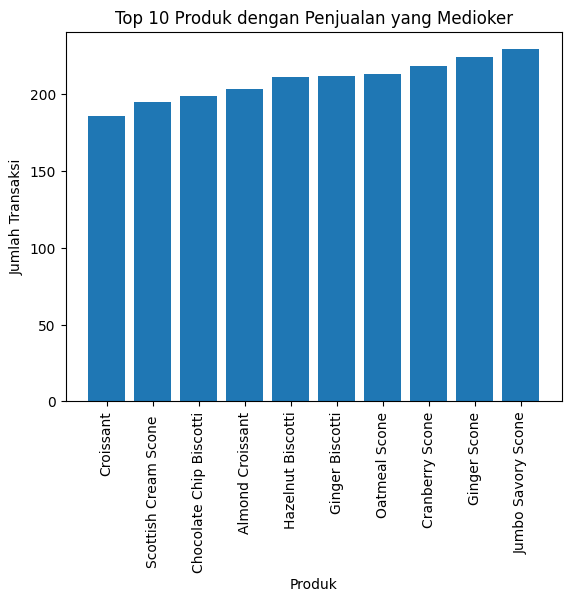

In [44]:
# Join sales_receipt dengan sales_outlet
sales = pd.merge(salesRecieptsTable, salesOutletTable[['sales_outlet_id', 'store_city', 'store_state_province', 'store_address']], on='sales_outlet_id')

# Hitung jumlah transaksi (transaction_id) pada setiap produk pada setiap toko
sales_by_product_and_outlet = sales.groupby(['product_id', 'store_city'])['transaction_id'].count().reset_index()

# Gabungkan dengan tabel product
sales_by_product_and_outlet = pd.merge(sales_by_product_and_outlet, productTable[['product_id', 'product']], on='product_id')

# Cari nilai median dari jumlah transaksi pada setiap produk
median_sales = sales_by_product_and_outlet.groupby('product_id')['transaction_id'].median().reset_index()

# Gabungkan hasil median_sales dengan sales_by_product_and_outlet
sales_by_product_and_outlet = pd.merge(sales_by_product_and_outlet, median_sales, on='product_id', suffixes=('_store', '_median'))

# Filter produk yang memiliki jumlah transaksi di bawah median
mediocre_products = sales_by_product_and_outlet[sales_by_product_and_outlet['transaction_id_store'] < sales_by_product_and_outlet['transaction_id_median']]['product'].unique()

# Filter data untuk produk dengan penjualan medioker
mediocre_sales = sales_by_product_and_outlet[sales_by_product_and_outlet['transaction_id_store'] < sales_by_product_and_outlet['transaction_id_median']]
mediocre_sales_by_product = mediocre_sales.groupby('product')['transaction_id_store'].sum().reset_index()

# Urutkan produk berdasarkan jumlah penjualan
mediocre_sales_by_product = mediocre_sales_by_product.sort_values('transaction_id_store', ascending=True)

# Ambil top 10 produk dengan penjualan medioker tertinggi
top_mediocre_products = mediocre_sales_by_product.head(10)

# Plot bar chart
plt.bar(top_mediocre_products['product'], top_mediocre_products['transaction_id_store'])
plt.xticks(rotation=90)
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Produk')
plt.title('Top 10 Produk dengan Penjualan yang Medioker')
plt.show()


5.   Kota apa yang memiliki daya jual yang tinggi?

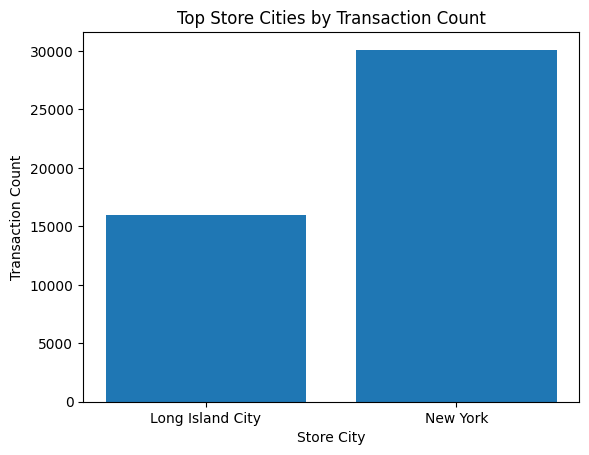

In [45]:
# join tabel sales_receipt dan sales_outlet
sales = pd.merge(salesRecieptsTable, salesOutletTable[['sales_outlet_id', 'store_city', 'store_state_province', 'store_address']], on='sales_outlet_id')

# hitung total transaksi pada setiap store_city
sales_by_city = sales.groupby('store_city')['transaction_id'].count().reset_index()

# urutkan berdasarkan jumlah transaksi dari yang terbanyak
sales_by_city = sales_by_city.sort_values(by='transaction_id', ascending=True)

# buat bar chart
plt.bar(sales_by_city['store_city'], sales_by_city['transaction_id'])
plt.title('Top Store Cities by Transaction Count')
plt.xlabel('Store City')
plt.ylabel('Transaction Count')
plt.show()

# tidak ada brooklyn karena tidak pernah ada transaksi/ transaksi tidak tercatat

## 9. Rekomendasi

1.   Targetkan material marketing kepada para customer dengan generasi baby boomers
2.   Selain baby boomers, juga harus giat melakukan marketing pada generasi muda (gen x  dan z)
2.   Dapat menghilangkan produk dengan waste percentage tertinggi
3.   Karena produk unggulan kita merupakan biji kopi untuk penjualan tertinggi, tidak ada salahnya untuk menaikkan penjualan produk nonkopi
4. perbedaan penjualan pada kota new york dan Long Island cukup tinggi, Selidiki mengapa penjualan kedua kota ini memiliki perbedaan yang signifikan
5.  Untuk produk dengan penjualan yang medioker, dapat dihilangkan atau dibuat variasi yang lebih menarik lagi


## 10. Kesimpulan - Create the story

1.   Generasi tua (Baby Boomers) adalah pelanggan setia pada toko kopi ini
2.   Produk terlaris merupakan dari kalangan menu kopi
3.   Masih ada produk yang "mubazir" sehingga lebih baik tidak diproduksi sama sekali ditimbang dari waste percentage yang tinggi
4.   Produk yang medioker harus dilakukan gencar promosi sehingga lebih menarik dan diminati oleh segala kalangan
5.   Masih harus diadakan penyelidikan lebih mendalam terkait perbedaan penjualan yang signifikan pada kota NY dan Long Island.
6.   Lebih banyak customer perempuan yang melakukan transaksi pada setiap outlet toko

## Uncomment cell di bawah jika ingin melakukan export file excel

In [47]:
# # buat dictionary dengan nama sheet sebagai key dan data frame sebagai value
# dfs = {'Sales Outlet': salesOutletTable,
#             'Customer': customerTable,
#             'Pastry Inventory': pastryInventoryTable,
#             'Generation' : generationsTable,
#             'Product' : productTable,
#             'Sales Receipt' : salesRecieptsTable,
#             'Merged Customer' : customerMerged,
#             'Wasted Products':top_waste_products,
#             'Produk Sales Tertinggi':top_products,
#             'Kota dengan Penjualan Tertinggi':sales_by_city,
#             'Produk Medioker':top_mediocre_products,
#             'Penjualan Berdasarkan Generasi':generation_sales}

# # buat objek ExcelWriter
# writer = pd.ExcelWriter('dataframes.xlsx')

# # loop setiap data frame dalam dictionary dan simpan ke file excel
# for sheet_name, df in dfs.items():
#       df.to_excel(writer, sheet_name=sheet_name, index=False)

# # simpan file excel
# writer.save()

C:\Users\Tangbim\AppData\Local\Temp\ipykernel_19664\3488908642.py:23: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
